In [54]:
import pandas as pd
import numpy as np
import warnings
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv('combined.csv')
df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
0,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,61
1,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69,61
2,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68,61
3,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68,61
4,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217537,1.323461,103.890038,83B,CIRCUIT ROAD,372083,83B CIRCUIT RD,6213.076992,264.745749,2024-05,GEYLANG,4 ROOM,83B,CIRCUIT RD,13 TO 15,96.0,Model A,2020,970000.0,95 years 01 month,95
217538,1.323461,103.890038,83B,CIRCUIT ROAD,372083,83B CIRCUIT RD,6213.076992,264.745749,2024-05,GEYLANG,4 ROOM,83B,CIRCUIT RD,04 TO 06,96.0,Model A,2020,935000.0,95 years 01 month,95
217539,1.323461,103.890038,83B,CIRCUIT ROAD,372083,83B CIRCUIT RD,6213.076992,264.745749,2024-05,GEYLANG,4 ROOM,83B,CIRCUIT RD,13 TO 15,96.0,Model A,2020,960000.0,95 years 01 month,95
217540,1.353327,103.739336,460C,BUKIT BATOK WEST AVENUE 9,653460,460C BT BATOK WEST AVE 9,14687.959399,1233.561855,2024-05,BUKIT BATOK,2 ROOM,460C,BT BATOK WEST AVE 9,16 TO 18,48.0,2-room,2020,350000.0,95 years 01 month,95


In [8]:
df.dtypes

df.isnull().sum()

latitude                0
longitude               0
blk_no                 15
road_name               0
postal_code             0
address                 0
cbd_dist                0
min_dist_mrt            0
month                   0
town                    0
flat_type               0
block                   0
street_name             0
storey_range            0
floor_area_sqm          0
flat_model              0
lease_commence_date     0
resale_price            0
remaining_lease         0
lease_remain_years      0
dtype: int64

In [9]:
def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median

df['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))
df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years,storey_median
0,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2015-01,ANG MO KIO,...,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,61,8.0
1,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2015-12,ANG MO KIO,...,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69,61,11.0
2,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-05,ANG MO KIO,...,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68,61,5.0
3,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-06,ANG MO KIO,...,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68,61,8.0
4,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-11,ANG MO KIO,...,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68,61,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217537,1.323461,103.890038,83B,CIRCUIT ROAD,372083,83B CIRCUIT RD,6213.076992,264.745749,2024-05,GEYLANG,...,83B,CIRCUIT RD,13 TO 15,96.0,Model A,2020,970000.0,95 years 01 month,95,14.0
217538,1.323461,103.890038,83B,CIRCUIT ROAD,372083,83B CIRCUIT RD,6213.076992,264.745749,2024-05,GEYLANG,...,83B,CIRCUIT RD,04 TO 06,96.0,Model A,2020,935000.0,95 years 01 month,95,5.0
217539,1.323461,103.890038,83B,CIRCUIT ROAD,372083,83B CIRCUIT RD,6213.076992,264.745749,2024-05,GEYLANG,...,83B,CIRCUIT RD,13 TO 15,96.0,Model A,2020,960000.0,95 years 01 month,95,14.0
217540,1.353327,103.739336,460C,BUKIT BATOK WEST AVENUE 9,653460,460C BT BATOK WEST AVE 9,14687.959399,1233.561855,2024-05,BUKIT BATOK,...,460C,BT BATOK WEST AVE 9,16 TO 18,48.0,2-room,2020,350000.0,95 years 01 month,95,17.0


In [20]:
df['storey_median_1'] = df['storey_range'].apply(get_median)
df

NameError: name 'df' is not defined

In [12]:
scope_df = df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']]
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,10296.855747,1098.780832,60.0,61,8.0,255000.0
1,10296.855747,1098.780832,60.0,61,11.0,275000.0
2,10296.855747,1098.780832,69.0,61,5.0,310000.0
3,10296.855747,1098.780832,45.0,61,8.0,253000.0
4,10296.855747,1098.780832,61.0,61,5.0,290000.0
...,...,...,...,...,...,...
217537,6213.076992,264.745749,96.0,95,14.0,970000.0
217538,6213.076992,264.745749,96.0,95,5.0,935000.0
217539,6213.076992,264.745749,96.0,95,14.0,960000.0
217540,14687.959399,1233.561855,48.0,95,17.0,350000.0


In [13]:
scope_df = scope_df.drop_duplicates()
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,10296.855747,1098.780832,60.0,61,8.0,255000.0
1,10296.855747,1098.780832,60.0,61,11.0,275000.0
2,10296.855747,1098.780832,69.0,61,5.0,310000.0
3,10296.855747,1098.780832,45.0,61,8.0,253000.0
4,10296.855747,1098.780832,61.0,61,5.0,290000.0
...,...,...,...,...,...,...
217537,6213.076992,264.745749,96.0,95,14.0,970000.0
217538,6213.076992,264.745749,96.0,95,5.0,935000.0
217539,6213.076992,264.745749,96.0,95,14.0,960000.0
217540,14687.959399,1233.561855,48.0,95,17.0,350000.0


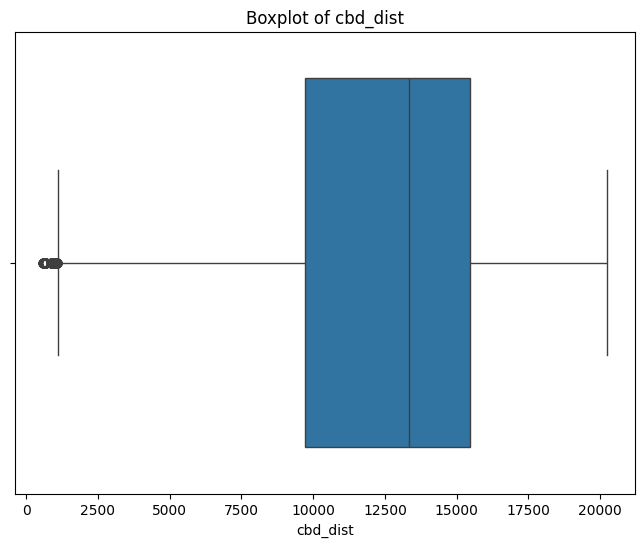

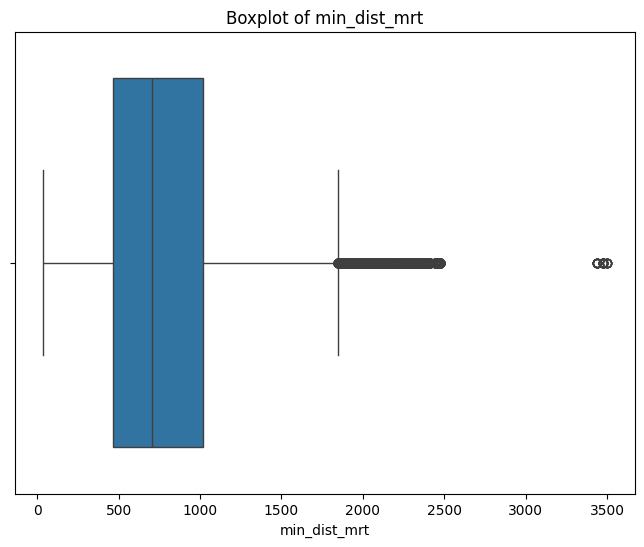

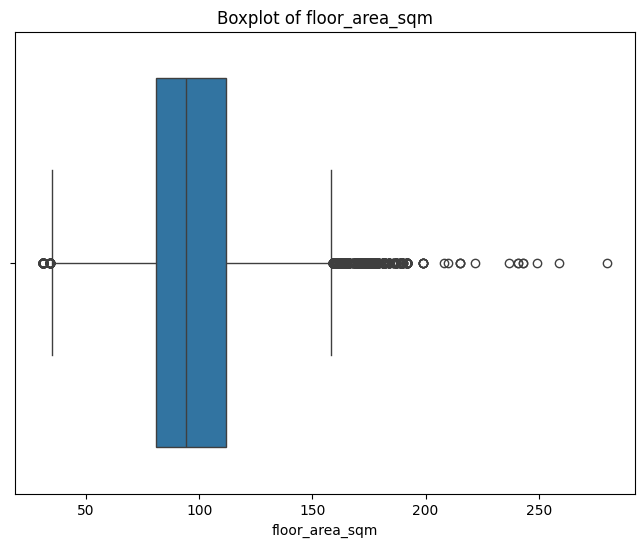

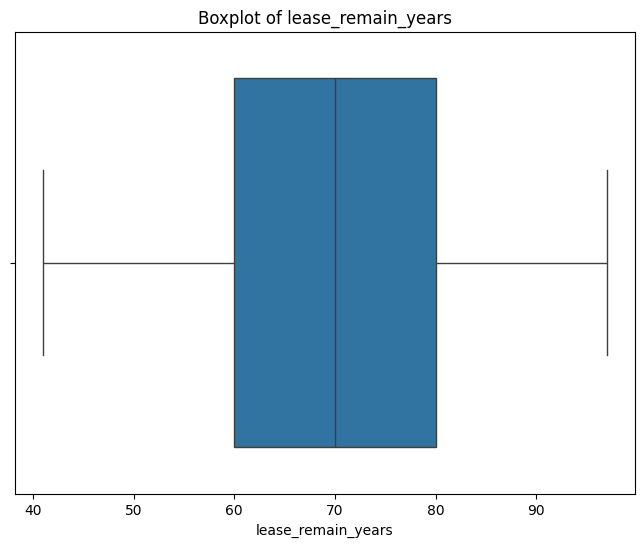

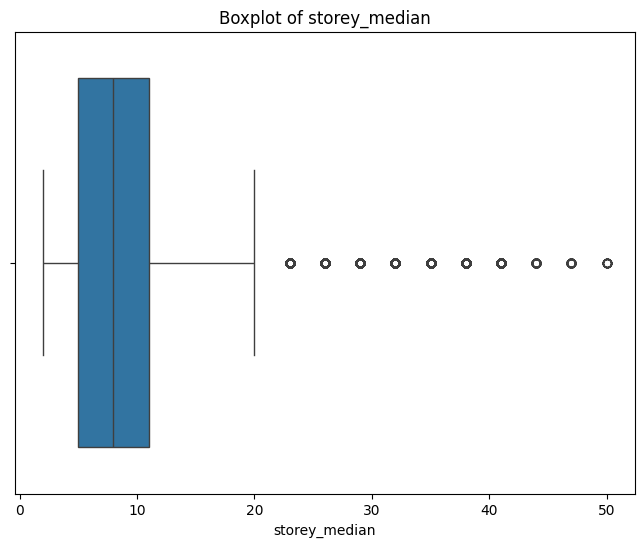

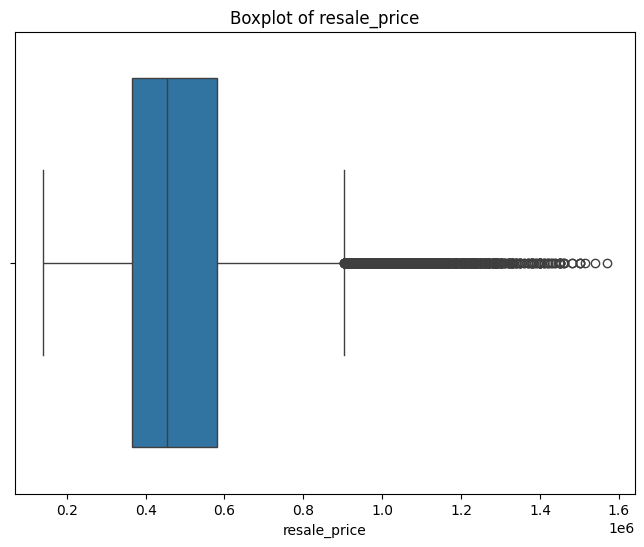

In [15]:
# List of columns(continuous variables) for finding skewness
col = ['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [16]:
df1 = scope_df

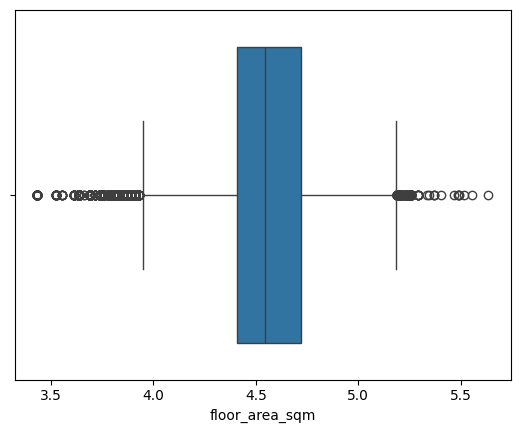

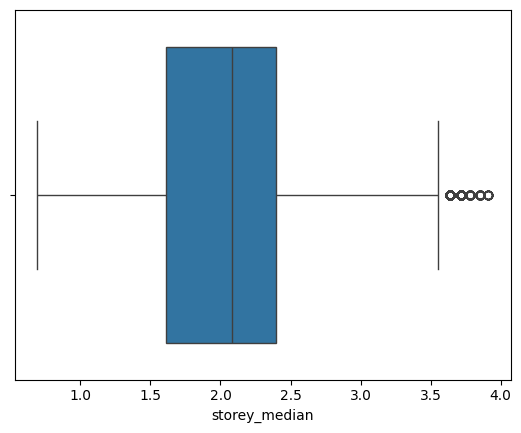

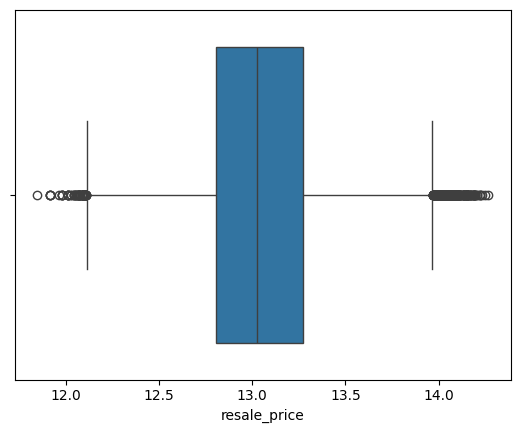

In [17]:
# Apply a logarithmic transformation to the required columns only.
# One need to apply it and check, in some cases it will handle the skewness, and in other cases it might not have a great 
                                                                # effect on the data, so no need to apply for that columns
    
df1['floor_area_sqm'] = np.log(df1['floor_area_sqm'])
sns.boxplot(x='floor_area_sqm', data=df1)
plt.show()

df1['storey_median'] = np.log(df1['storey_median'])
sns.boxplot(x='storey_median', data=df1)
plt.show()

df1['resale_price'] = np.log(df1['resale_price'])
sns.boxplot(x='resale_price', data=df1)
plt.show()

# Correlation Heatmap

<Axes: title={'center': 'Correlation Heatmap'}>

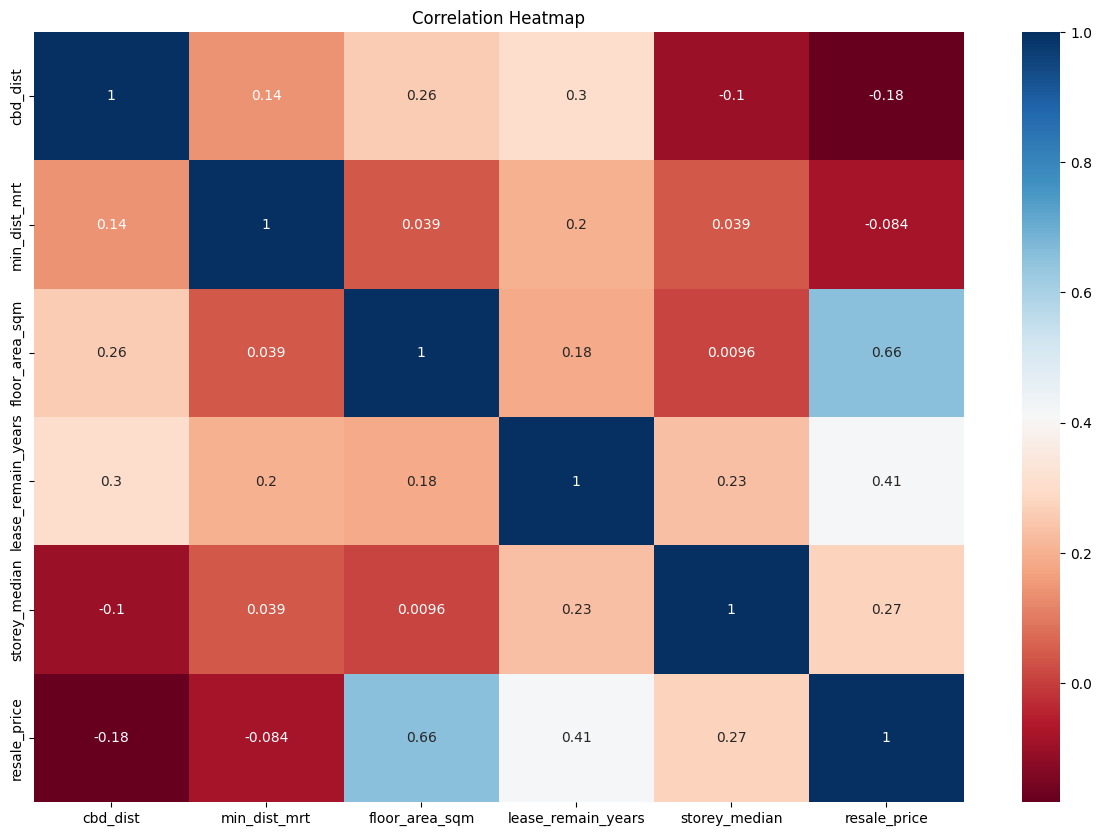

In [18]:
corrMatrix = df1.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)

In [20]:
X=df1[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']]
y=df1['resale_price']

# Normalizing the encoded data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [29]:
# Decision Tree Regressor
dtr = DecisionTreeRegressor()

# Hyperparameters
param_grid = {
    'max_depth': [2, 5, 10,20],
    'min_samples_split': [2, 4, 7],
    'min_samples_leaf': [2, 5, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 20, 'min_samples_split': 2}


In [30]:
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)

 
Mean squared error: 0.016072861751020278
Mean Absolute Error 0.10140793589312169
Root Mean squared error: 0.12677879061980468
 
R-squared: 0.854609562711022


# Testing Our Trained Model

In [32]:

new_sample = np.array([[8740, 999, np.log(44), 55, np.log(11)]])
new_sample = scaler.transform(new_sample[:, :5])
new_pred = best_model.predict(new_sample)[0]
np.exp(new_pred)

245633.35284560206

In [33]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [65]:
%%writefile Singapore_App.py

import streamlit as st
from streamlit_option_menu import option_menu
import json
import requests
import pandas as pd
from geopy.distance import geodesic
import statistics
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# ----------------------------------------Functions---------------------------------------------------------
# To get mrt_df
def get_mrt_df():
    df = pd.read_csv('mrt.csv').reset_index(drop= True)
    return df

# To load pickles
def load_pickles():
    with open(r"model.pkl", 'rb') as file:
        loaded_model = pickle.load(file)
    with open(r'scaler.pkl', 'rb') as f:
        scaler_loaded = pickle.load(f)
    return loaded_model, scaler_loaded
# Pre_processing input    
def preprocessing_input(street_name,block,lease_commence_year,storey_range):
    # -----Calculating lease_remain_years using lease_commence_year-----
    lease_remain_years = 99 - (2023 - lease_commence_year)

    # -----Calculating median of storey_range to make our calculations quite comfortable-----
    split_list = storey_range.split(' TO ')
    float_list = [float(i) for i in split_list]
    storey_median = statistics.median(float_list)
    min_dist_mrt, cbd_dist = get_min_distance_from_MRT_CBD(block,street_name)
    return storey_median,lease_remain_years, min_dist_mrt, cbd_dist

def get_min_distance_from_MRT_CBD(block,street_name):

    # Getting the address by joining the block number and the street name
    addrs = block + " " + street_name
    url = "https://www.onemap.gov.sg/api/common/elastic/search?searchVal="+str(addrs)+"&returnGeom=Y&getAddrDetails=Y&pageNum=1"
    resp = requests.get(url)

    # Using OpenMap API getting the latitude and longitude location of that address
    origin = []
    data_geo_location = json.loads(resp.content)
    if data_geo_location['found'] != 0:
            latitude = data_geo_location['results'][0]['LATITUDE']
            longitude = data_geo_location['results'][0]['LONGITUDE']
            origin.append((latitude, longitude))
    else:
        st.warning('Location Not found')
        return None

    # Appending the Latitudes and Longitudes of the MRT Stations
    # Latitudes and Longitudes are been appended in the form of a tuple to that list
    mrt_location = get_mrt_df()
    mrt_lat = mrt_location['latitude']
    mrt_long = mrt_location['longitude']
    list_of_mrt_coordinates = []
    for lat, long in zip(mrt_lat, mrt_long):
        list_of_mrt_coordinates.append((lat, long))

    # Getting distance to nearest MRT Stations (Mass Rapid Transit System)
    list_of_dist_mrt = []
    for destination in range(0, len(list_of_mrt_coordinates)):
        list_of_dist_mrt.append(geodesic(origin, list_of_mrt_coordinates[destination]).meters)
    min_dist_mrt = min(list_of_dist_mrt)

    # Getting distance from CBD (Central Business District)
    cbd_dist = geodesic(origin, (1.2830, 103.8513)).meters  # CBD coordinates\
    
    return min_dist_mrt,cbd_dist


# -------------------------------This is the configuration page for our Streamlit Application---------------------------
st.set_page_config(
    page_title="Singapore Resale Flat Prices Prediction",
    page_icon="🏨",
    layout="wide"
)

# -------------------------------This is the sidebar in a Streamlit application, helps in navigation--------------------
with st.sidebar:
    selected = option_menu("Main Menu", ["About Project", "Predictions"],
                           icons=["house", "gear"],
                           styles={"nav-link": {"font": "sans serif", "font-size": "20px", "text-align": "centre"},
                                   "nav-link-selected": {"font": "sans serif", "background-color": "#0072b1"},
                                   "icon": {"font-size": "20px"}
                                   }
                           )

# -----------------------------------------------About Project Section--------------------------------------------------
if selected == "About Project":
    st.markdown("# :blue[Singapore Resale Flat Prices Prediction]")
    st.markdown('<div style="height: 50px;"></div>', unsafe_allow_html=True)
    st.markdown("### :blue[Technologies :] Python, Pandas, Numpy, Scikit-Learn, Streamlit, Python scripting, "
                "Machine Learning, Data Preprocessing, Visualization, EDA, Model Building, Data Wrangling, "
                "Model Deployment")
    st.markdown("### :blue[Overview :] This project aims to construct a machine learning model and implement "
                "it as a user-friendly online application in order to provide accurate predictions about the "
                "resale values of apartments in Singapore. This prediction model will be based on past transactions "
                "involving resale flats, and its goal is to aid both future buyers and sellers in evaluating the "
                "worth of a flat after it has been previously resold. Resale prices are influenced by a wide variety "
                "of criteria, including location, the kind of apartment, the total square footage, and the length "
                "of the lease. The provision of customers with an expected resale price based on these criteria is "
                "one of the ways in which a predictive model may assist in the overcoming of these obstacles.")
    st.markdown("### :blue[Domain :] Real Estate")

# ------------------------------------------------Predictions Section---------------------------------------------------
if selected == "Predictions":
    st.markdown("# :blue[Predicting Results based on Trained Models]")
    st.markdown("### :orange[Predicting Resale Price (Regression Task) (Accuracy: 87%)]")
    
    
    with st.form("form1"):
    
    # -----New Data inputs from the user for predicting the resale price-----
        st.write( f'<h5 style="color:rgb(0, 153, 153,0.4);">NOTE: Min & Max given for reference, you can enter any value</h5>', unsafe_allow_html=True )
        street_name = st.text_input("Street Name")
        block = st.text_input("Block Number")
        floor_area_sqm = st.number_input('Floor Area (Per Square Meter) (min_value=30.0, max_value=300.0)', )
        lease_commence_year = st.number_input('Lease Commence Year (min_value = 1966, max_value=2024)')
        storey_range = st.text_input("Storey Range (Format: 'Value1' TO 'Value2')")

        # -----Submit Button for PREDICT RESALE PRICE-----

        submit_button = st.form_submit_button(label="PREDICT RESALE PRICE")

        if submit_button:
            try: 
                loaded_model, scaler_loaded  = load_pickles()
                storey_median,lease_remain_years, min_dist_mrt, cbd_dist = preprocessing_input(street_name,block,lease_commence_year,storey_range)

                # -----Sending the user enter values for prediction to our model-----
                new_sample = np.array(
                    [[cbd_dist, min_dist_mrt, np.log(floor_area_sqm), lease_remain_years, np.log(storey_median)]])
                new_sample = scaler_loaded.transform(new_sample[:, :5])
                new_pred = loaded_model.predict(new_sample)[0]
                st.write('## :green[Predicted resale price:] ', np.floor(np.exp(new_pred)),':green[$]' )
            except Exception as err:
                st.warning("Please fill the form with Valid Details")




Overwriting Singapore_App.py


        latitude   longitude blk_no                  road_name postal_code  \
0       1.375097  103.837619    174        ANG MO KIO AVENUE 4      560174   
1       1.375097  103.837619    174        ANG MO KIO AVENUE 4      560174   
2       1.375097  103.837619    174        ANG MO KIO AVENUE 4      560174   
3       1.375097  103.837619    174        ANG MO KIO AVENUE 4      560174   
4       1.375097  103.837619    174        ANG MO KIO AVENUE 4      560174   
...          ...         ...    ...                        ...         ...   
217537  1.323461  103.890038    83B               CIRCUIT ROAD      372083   
217538  1.323461  103.890038    83B               CIRCUIT ROAD      372083   
217539  1.323461  103.890038    83B               CIRCUIT ROAD      372083   
217540  1.353327  103.739336   460C  BUKIT BATOK WEST AVENUE 9      653460   
217541  1.341003  103.742339   240A       JURONG EAST AVENUE 1      601240   

                         address      cbd_dist  min_dist_mrt   